# The Spark Foundation - GRIP

# Data Science and Business Analytics Intern November 2022

## Task:01   "Prediction using Supervised ML"
#### Linear Regression task working on two variables (x,y), using Python.

### By: Ayesha Qamar

#### Task: Predict the percentage of an student based on the no. of study hours.
What will be predicted score if a student studies for 9.25 hrs/day?

#### Dataset: https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

In [1]:
# Importing Python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# Importing dataset from given url
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

In [3]:
# Reading first six rows from dataset
df.head(6)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20


In [4]:
# Reading last six rows from dataset
df.tail(6)

,Hours,Scores
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
# Checking for null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
# Checking data type
df.dtypes

Hours     float64
Scores      int64
dtype: object

#### The dataset contain 25 rows and 2 columns as showing below

In [7]:
df.shape

(25, 2)

In [8]:
# For the Statistics of DataFrame
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
# Showing insights of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
# Checking correlation between the entities
df[['Hours','Scores']].corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Plotting the Dataset
##### Linear relation between the no of hours studied and student score is visible in graph.


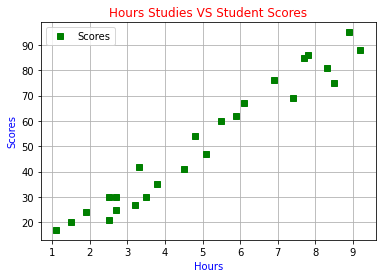

In [11]:
# Showing the visual representation of Study Hours Vs Student Scores
df.plot(x='Hours', y='Scores', style = 's', color='green')
plt.title('Hours Studies VS Student Scores', color='red')
plt.xlabel('Hours', color='blue')
plt.ylabel('Scores', color='blue')
plt.grid()
plt.show()

<AxesSubplot:xlabel='Hours'>

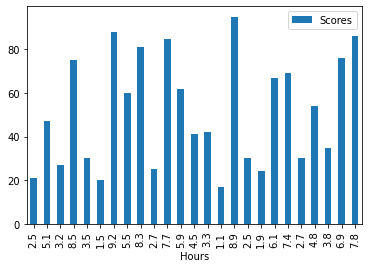

In [12]:
# Also shown in bar visualizations
df.plot.bar(x='Hours',y='Scores')

In [13]:
# Dividing data 
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

## Splitting Data Process
##### Splitting the data into training and testing set

In [14]:
# From sklearn.model_selection where we imported train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=36)
print("Data splitted successfully")

Data splitted successfully


In [15]:
len(x_train),len(x_test)

(17, 8)

In [16]:
len(y_train),len(y_test)

(17, 8)

## Training the Algorithm

In [17]:
# From sklearn.linear_model imported LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

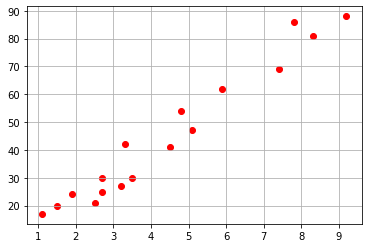

In [18]:
plt.scatter(x_train, y_train, color='red')
plt.grid()

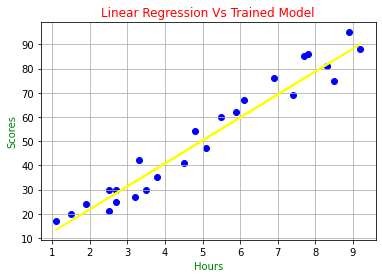

In [19]:
# Plotting te regression line
reg_line = regressor.coef_*x+regressor.intercept_

# Plotting test data
plt.title('Linear Regression Vs Trained Model', color='red')
plt.scatter(x,y, label="Trained Model", color='blue')
plt.plot(x, reg_line, label="Linear Regression", color='yellow')
plt.xlabel('Hours', color='green')
plt.ylabel('Scores', color='green')
plt.grid()
plt.show()

## Slope and Interception

In [20]:
# For coefficient and interception
print("Coefficient:", regressor.coef_)
print("Intercept:", regressor.intercept_)

Coefficient: [9.48298152]
Intercept: 2.8813642988105883


## Predictions of Scores

In [21]:
regressor.predict(x)

array([26.58881811, 51.24457007, 33.22690518, 83.48670725, 36.07179963,
       17.10583659, 90.12479432, 55.03776268, 81.59011095, 28.48541441,
       75.90032203, 58.83095529, 45.55478116, 34.17520333, 13.31264398,
       87.27989986, 26.58881811, 20.89902919, 60.7275516 , 73.05542758,
       28.48541441, 48.39967561, 38.91669409, 68.31393682, 76.84862019])

In [22]:
print(x_test) #prediction in hours
pred = regressor.predict(x_test) #prediction of scores
pred

[[8.9]
 [6.9]
 [7.7]
 [6.1]
 [8.5]
 [3.8]
 [5.5]
 [2.5]]


array([87.27989986, 68.31393682, 75.90032203, 60.7275516 , 83.48670725,
       38.91669409, 55.03776268, 26.58881811])

## Finding the prediction of studies 9.25 hrs/day.

In [23]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = ",hours)
print("Predicted Score = ",own_pred)

No of Hours =  [[9.25]]
Predicted Score =  [90.5989434]


Therefore 90.598 is the predicted score if the student studies for 9.25 hrs/day.

In [24]:
# Comparing Original Vs Predicted Scores
pd.DataFrame(np.c_[x_test, y_test, pred], columns=['Hours','Original','Predicted'])

,Hours,Original,Predicted
0,8.9,95.0,87.279900
1,6.9,76.0,68.313937
2,7.7,85.0,75.900322
3,6.1,67.0,60.727552
4,8.5,75.0,83.486707
5,3.8,35.0,38.916694
6,5.5,60.0,55.037763
7,2.5,30.0,26.588818


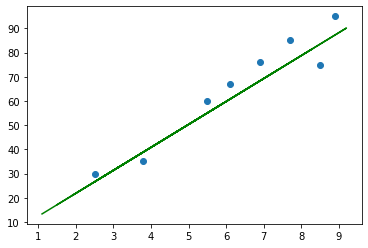

In [25]:
plt.scatter(x_test,y_test)
plt.plot(x_train, regressor.predict(x_train), color='g')

## Checking Mean Absolute Error

In [26]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,pred))

Mean Absolute Error: 6.444388780499278
